## 安装pytorch

In [1]:
# 导入魔法命令
%run helper.py

# 内联图片
%matplotlib inline

In [2]:
# 打印版本号
print(torch.__version__)

1.13.1+cpu

## 基本使用方法

In [3]:
# 创建一个矩阵
x = torch.empty(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [4]:
# 自动微分
x = torch.tensor(1.)
a = torch.tensor(1., requires_grad = True)
b = torch.tensor(1., requires_grad = True)
c = torch.tensor(1., requires_grad = True)

y = a**3 * x + b * x + c

print(a.grad, b.grad, c.grad)
grads = autograd.grad(y, [a, b ,c])
print(grads[0], grads[1], grads[2])

None None None

tensor(3.) tensor(1.) tensor(1.)

### 张量(Tensors)

#### 声明和定义

首先是对 Tensors 的声明和定义方法，分别有以下几种:


In [5]:
# 创建一个 5*3 的矩阵
x = torch.empty(5, 3)
print(x)
print(type(x))

tensor([[-4.7926e+05,  4.5680e-41, -4.5841e+05],
        [ 4.5680e-41, -4.5836e+05,  4.5680e-41],
        [ 1.3915e+29,  4.5680e-41,  1.4320e+31],
        [ 4.5680e-41,  6.3378e+29,  4.5680e-41],
        [ 6.1814e+29,  4.5680e-41, -5.1198e+05]])

<class 'torch.Tensor'>

In [6]:
# 创建一个随机初始化的 5*3 矩阵
rand_x = torch.rand(5, 3)
print(rand_x)

tensor([[0.9055, 0.3686, 0.1634],
        [0.8067, 0.9629, 0.3374],
        [0.0752, 0.4665, 0.6556],
        [0.7082, 0.8685, 0.8456],
        [0.0357, 0.9963, 0.2045]])

In [7]:
# 创建一个数值皆是 0，类型为 long 的矩阵
zero_x = torch.zeros(5, 3, dtype=torch.long)
print(zero_x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [8]:
# tensor 数值是 [5.5, 3]
tensor1 = torch.tensor([5.5, 3])
print(tensor1)

tensor([5.5000, 3.0000])

#### 张量计算

+ 运算符
    - torch.add(tensor1, tensor2, [out=tensor3])
    - tensor1.add_(tensor2)：直接修改 tensor 变量

In [9]:
# 显示定义新的尺寸是 5*3，数值类型是 torch.double
tensor2 = tensor1.new_ones(5, 3, dtype=torch.double)  # new_* 方法需要输入 tensor 大小
print(tensor2)
tensor3 = torch.randn_like(tensor2, dtype=torch.float)
print('tensor3: ', tensor3)
tensor4 = torch.rand(5, 3)
print('tensor3 + tensor4= ', tensor3 + tensor4)
print('tensor3 + tensor4= ', torch.add(tensor3, tensor4))
# 新声明一个 tensor 变量保存加法操作的结果
result = torch.empty(5, 3)
torch.add(tensor3, tensor4, out=result)
print('add result= ', result)
# 直接修改变量
tensor3.add_(tensor4)
print('tensor3= ', tensor3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

tensor3:  tensor([[ 0.1901, -1.2251, -0.3009],
        [ 2.4865,  0.3801, -0.1255],
        [ 0.8980, -0.1911,  0.6891],
        [-0.0911, -1.3428,  0.6023],
        [ 0.4686,  1.5598, -0.5430]])

tensor3 + tensor4=  tensor([[ 0.6430, -0.5648,  0.6036],
        [ 3.2327,  0.7502,  0.3075],
        [ 1.6707,  0.6381,  0.8801],
        [ 0.2326, -0.3924,  1.2099],
        [ 1.2922,  1.5821, -0.3092]])

tensor3 + tensor4=  tensor([[ 0.6430, -0.5648,  0.6036],
        [ 3.2327,  0.7502,  0.3075],
        [ 1.6707,  0.6381,  0.8801],
        [ 0.2326, -0.3924,  1.2099],
        [ 1.2922,  1.5821, -0.3092]])

add result=  tensor([[ 0.6430, -0.5648,  0.6036],
        [ 3.2327,  0.7502,  0.3075],
        [ 1.6707,  0.6381,  0.8801],
        [ 0.2326, -0.3924,  1.2099],
        [ 1.2922,  1.5821, -0.3092]])

tensor3=  tensor([[ 0.6430, -0.5648,  0.6036],
        [ 3.2327,  0.7502,  0.3075],
        [ 1.6707,  0.6381,  0.8801],
        [ 0.2326, -0.3924,  1.2099],
        [ 1.2922,  1.5821, -0.3092]])

#### 和 Numpy 数组的转换
Tensor 和 Numpy 的数组可以相互转换，并且两者转换后共享在 CPU 下的内存空间，即改变其中一个的数值，另一个变量也会随之改变。

In [10]:
# numpy转torch 
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

# torch转numpy

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)

print(a)
print(b)

tensor([1., 1., 1., 1., 1.])

[1. 1. 1. 1. 1.]

[2. 2. 2. 2. 2.]

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

### 自动求导(autograd)

对于 Pytorch 的神经网络来说，非常关键的一个库就是 autograd ，它主要是提供了对 Tensors 上所有运算操作的自动微分功能，也就是计算梯度的功能。它属于 define-by-run 类型框架，即反向传播操作的定义是根据代码的运行方式，因此每次迭代都可以是不同的。


In [11]:
# 定义
x = torch.ones(2, 2, requires_grad=True)
print(x)

# 执行计算
y = x + 2
print(y)

# 打印梯度
print(y.grad_fn)

# 继续计算
z = y * y * 3
out = z.mean()

print('z=', z)
print('out=', out)

# 计算梯度
# 接下来就是开始计算梯度，进行反向传播的操作

out.backward()
# 输出梯度 d(out)/dx
print(x.grad)


tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

<AddBackward0 object at 0x7f566fb3cac0>

z= tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)

out= tensor(27., grad_fn=<MeanBackward0>)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

## 神经网络

+ 定义一个多层的神经网络
+ 对数据集的预处理并准备作为网络的输入
+ 将数据输入到网络
+ 计算网络的损失
+ 反向传播，计算梯度
+ 更新网络的梯度，一个简单的更新规则是 weight = weight - learning_rate * gradient


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 输入图像是单通道，conv1 kenrnel size=5*5，输出通道 6
        self.conv1 = nn.Conv2d(1, 6, 5)
        # conv2 kernel size=5*5, 输出通道 16
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 全连接层
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # max-pooling 采用一个 (2,2) 的滑动窗口
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 核(kernel)大小是方形的话，可仅定义一个数字，如 (2,2) 用 2 即可
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        # 除了 batch 维度外的所有维度
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
# 这里必须实现 forward 函数，而 backward 函数在采用 autograd 时就自动定义好了，
# 在 forward 方法可以采用任何的张量操作。

params = list(net.parameters())
print('参数数量: ', len(params))
# conv1.weight
print('第一个参数大小: ', params[0].size())

参数数量:  10

第一个参数大小: 
torch.Size([6, 1, 5, 5])

In [14]:
# 输入一个随机数据
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0371, -0.0747, -0.0850, -0.0977,  0.1219,  0.0658,  0.0150,  0.1602,
         -0.1077,  0.0249]], grad_fn=<AddmmBackward0>)

In [15]:
# 清空所有参数的梯度缓存，然后计算随机梯度进行反向传播
net.zero_grad()
out.backward(torch.randn(1, 10))

### 损失函数

损失函数的输入是 (output, target) ，即网络输出和真实标签对的数据，然后返回一个数值表示网络输出和真实标签的差距。

PyTorch 中其实已经定义了不少的损失函数，这里仅采用简单的均方误差：nn.MSELoss ，例子如下：

In [16]:
output = net(input)
# 定义伪标签
target = torch.randn(10)
# 调整大小，使得和 output 一样的 size
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.4765, grad_fn=<MseLossBackward0>)

In [17]:
# MSELoss
print(loss.grad_fn)
# Linear layer
print(loss.grad_fn.next_functions[0][0])
# Relu
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

<MseLossBackward0 object at 0x7f566fb3fc40>

<AddmmBackward0 object at 0x7f566fb3f2e0>

<AccumulateGrad object at 0x7f566fb3fc40>

In [18]:
# 清空所有参数的梯度缓存
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward

tensor([0., 0., 0., 0., 0., 0.])

conv1.bias.grad after backward

tensor([-0.0143,  0.0061,  0.0035, -0.0154,  0.0019, -0.0182])

In [19]:
# 简单实现权重的更新例子
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [20]:
import torch.optim as optim
# 创建优化器
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练过程中执行下列操作
optimizer.zero_grad() # 清空梯度缓存
output = net(input)
loss = criterion(output, target)
loss.backward()
# 更新权重
optimizer.step()

##  训练分类器

+ 训练流程如下：
    - 通过调用 torchvision 加载和归一化 CIFAR10 训练集和测试集；
    - 构建一个卷积神经网络；
    - 定义一个损失函数；
    - 在训练集上训练网络；
    - 在测试集上测试网络性能

In [21]:
# 将图片数据从 [0,1] 归一化为 [-1, 1] 的取值范围
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


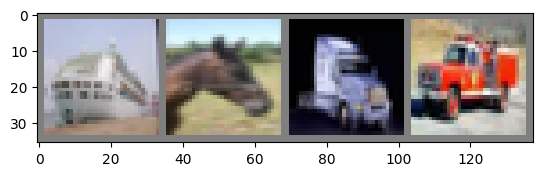

ship horse truck truck

In [22]:
# 展示图片的函数
def imshow(img):
    img = img / 2 + 0.5     # 非归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 随机获取训练集图片
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 展示图片
imshow(torchvision.utils.make_grid(images))
# 打印图片类别标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [23]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 定义损失函数和优化器

In [24]:
# 这里采用类别交叉熵函数和带有动量的 SGD 优化方法：

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 训练网络

> 第四步自然就是开始训练网络，指定需要迭代的 epoch，然后输入数据</br>
> 指定次数打印当前网络的信息，比如 loss 或者准确率等性能评价标准。

In [25]:
import time
start = time.time()
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取输入数据
        inputs, labels = data
        # 清空梯度缓存
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:
            # 每 2000 次迭代打印一次信息
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training! Total cost time: ', time.time()-start)

[1,  2000] loss: 2.236

[1,  4000] loss: 1.896

[1,  6000] loss: 1.714

[1,  8000] loss: 1.587

[1, 10000] loss: 1.557

[1, 12000] loss: 1.496

[2,  2000] loss: 1.428

[2,  4000] loss: 1.381

[2,  6000] loss: 1.367

[2,  8000] loss: 1.323

[2, 10000] loss: 1.313

[2, 12000] loss: 1.285

Finished Training! Total cost time:  36.5443811416626

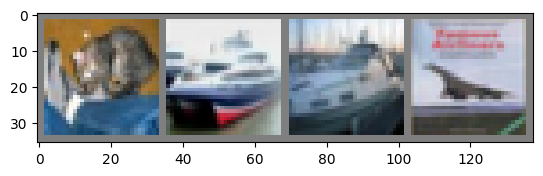

GroundTruth:    cat  ship  ship plane

In [26]:
# 测试
dataiter = iter(testloader)
images, labels = next(dataiter)

# 打印图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [27]:
# 网络输出
outputs = net(images)

# 预测结果
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship

In [28]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %

In [29]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 54 %

Accuracy of   car : 57 %

Accuracy of  bird : 38 %

Accuracy of   cat : 33 %

Accuracy of  deer : 48 %

Accuracy of   dog : 63 %

Accuracy of  frog : 55 %

Accuracy of horse : 61 %

Accuracy of  ship : 74 %

Accuracy of truck : 63 %

## 数据并行